In [1]:
                                                                    # DECISION TREE

In [2]:
# Tasks:

In [3]:
# 1. Data Preparation:

In [4]:
# Load the dataset into your preferred data analysis environment (e.g., Python with libraries like Pandas and NumPy).

In [5]:
import pandas as pd
df = pd.read_csv("heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,normal,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


In [6]:
# 2. Exploratory Data Analysis (EDA):

In [7]:
# Perform exploratory data analysis to understand the structure of the dataset.

In [8]:
df.shape

(908, 13)

In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [11]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [12]:
z = df.corr(numeric_only=True)
z

,age,trestbps,chol,fbs,thalch,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.242662,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.167131,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,0.029898,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.024365,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.139598,-0.323058
oldpeak,0.242662,0.167131,0.029898,0.024365,-0.139598,1.000000,0.437577
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.437577,1.000000


<Axes: >

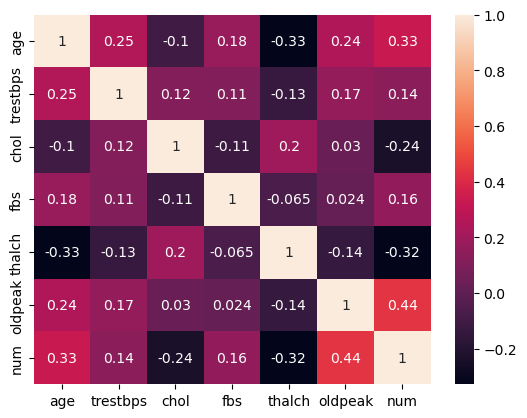

In [13]:
import seaborn as sns
sns.heatmap(z, annot=True)

In [14]:
# Check for missing values, outliers, and inconsistencies in the data.

In [15]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [16]:
df.nunique()

age          49
sex           2
cp            4
trestbps     85
chol        228
fbs           2
restecg       3
thalch      122
exang         3
oldpeak      53
slope         3
thal          3
num           5
dtype: int64

In [17]:
num_col = df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num'], dtype='object')

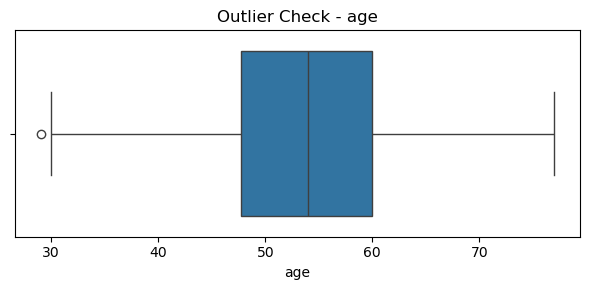

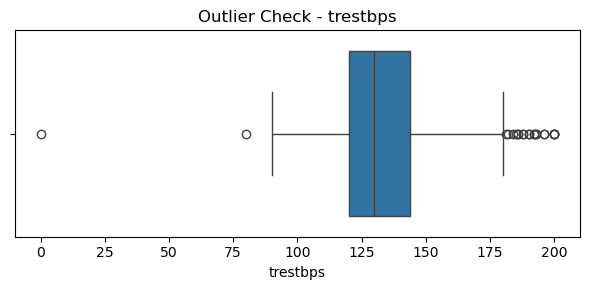

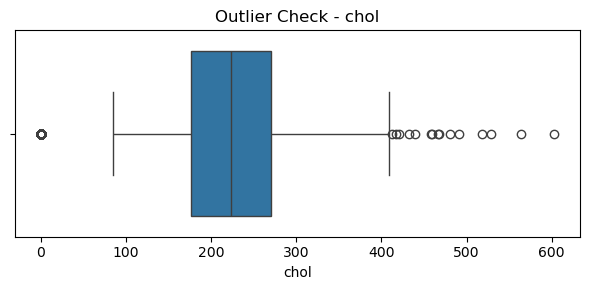

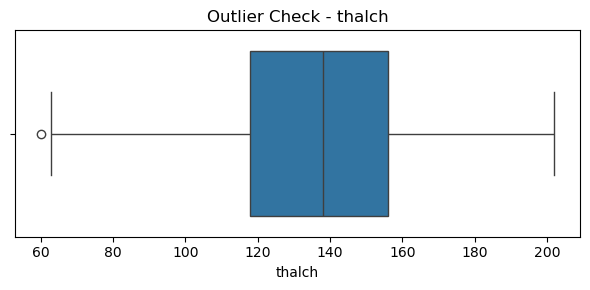

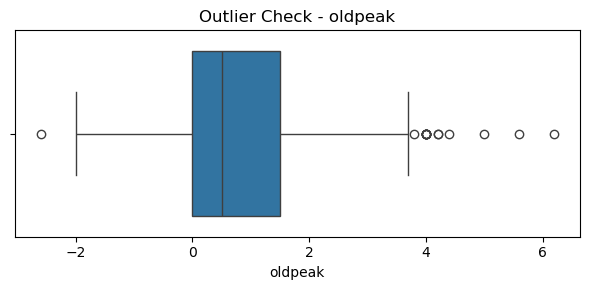

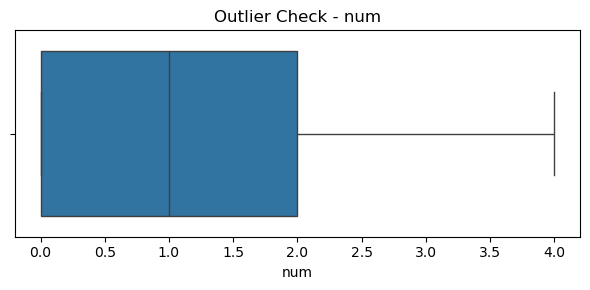

In [18]:
import matplotlib.pyplot as plt
for col in num_col:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check - {col}")
    plt.tight_layout()
    plt.show()

In [19]:
# Visualize the distribution of features, including histograms, box plots, and correlation matrices.

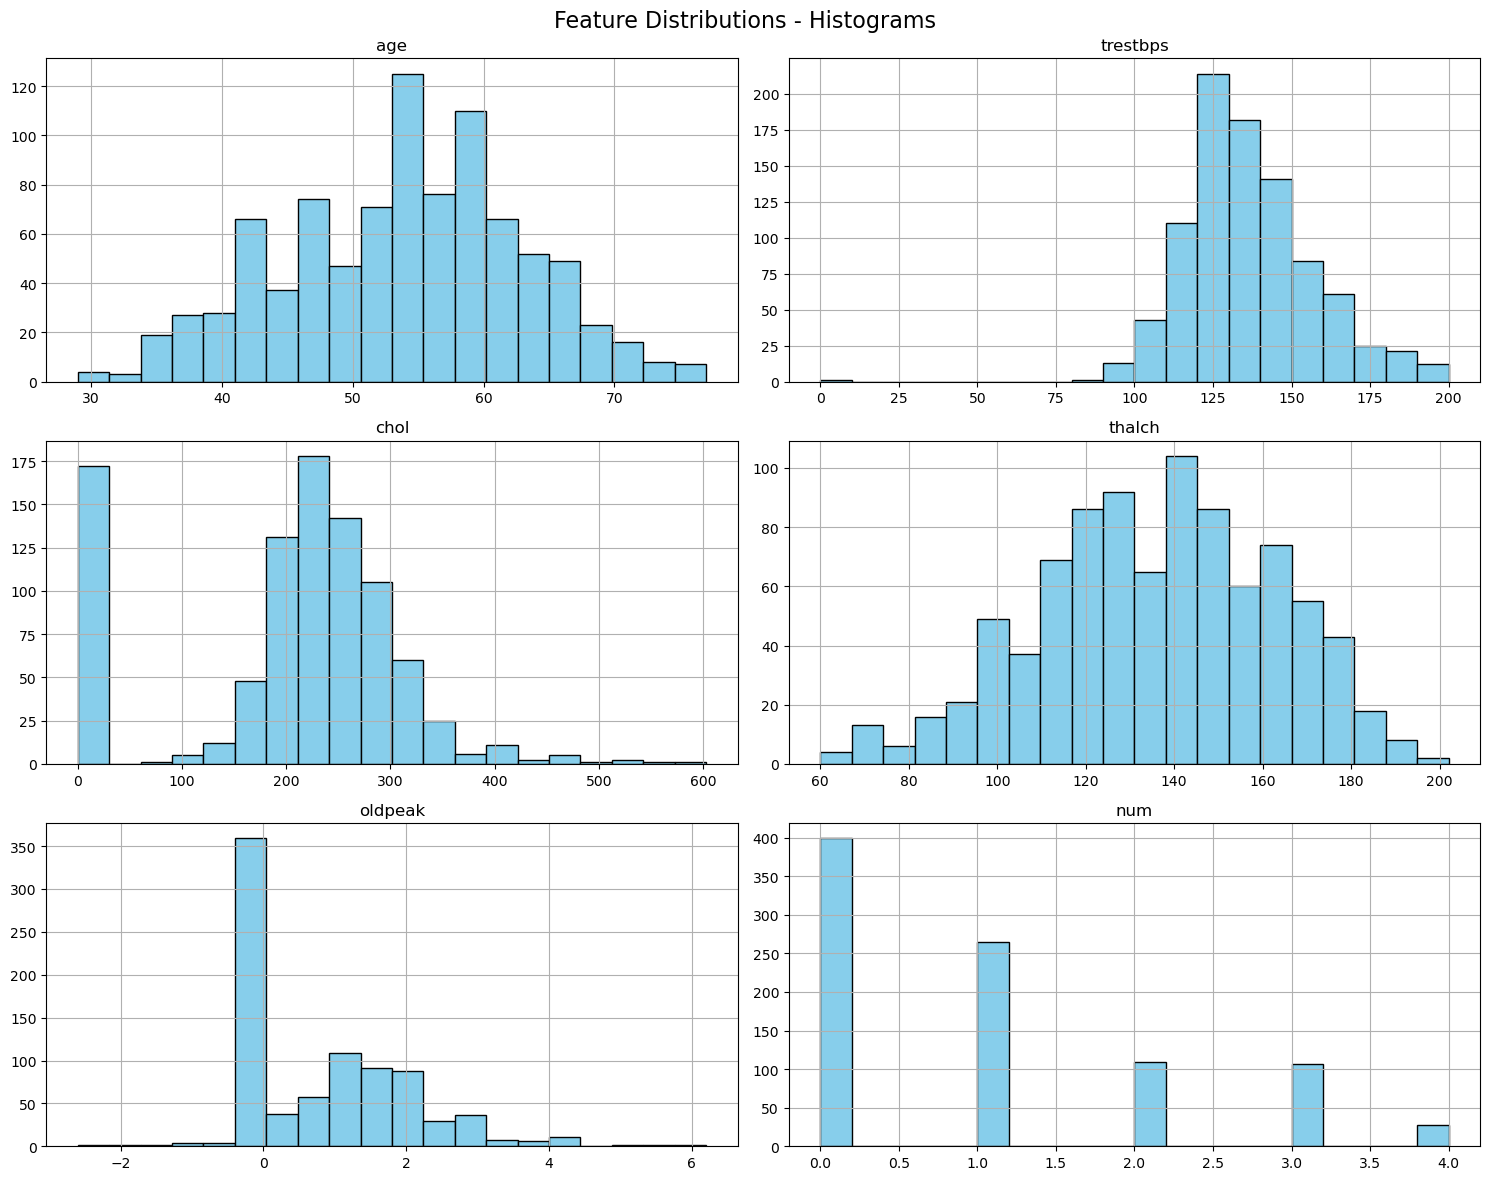

In [20]:
df.hist(figsize=(15, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions - Histograms", fontsize=16)
plt.tight_layout()
plt.show()

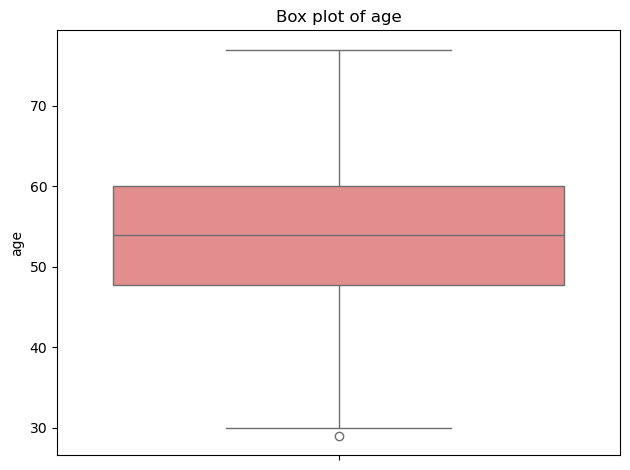

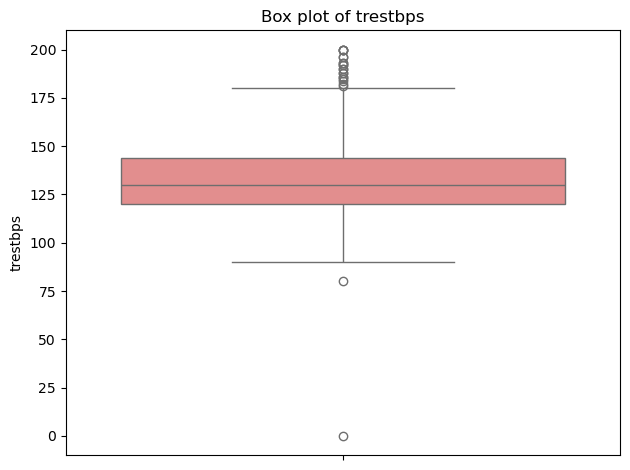

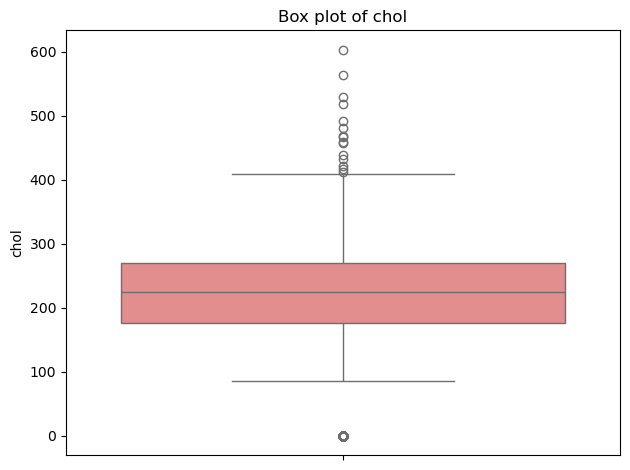

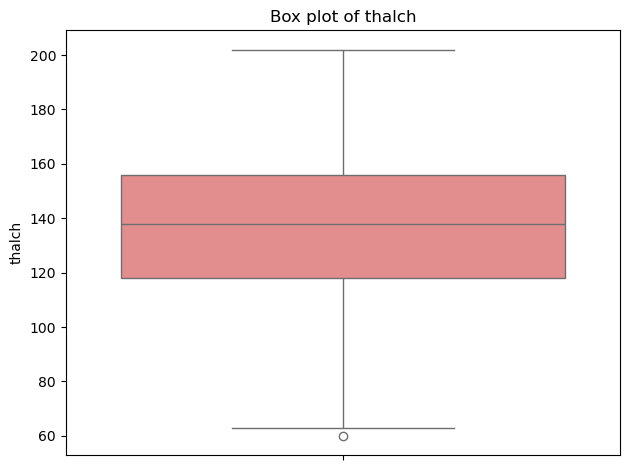

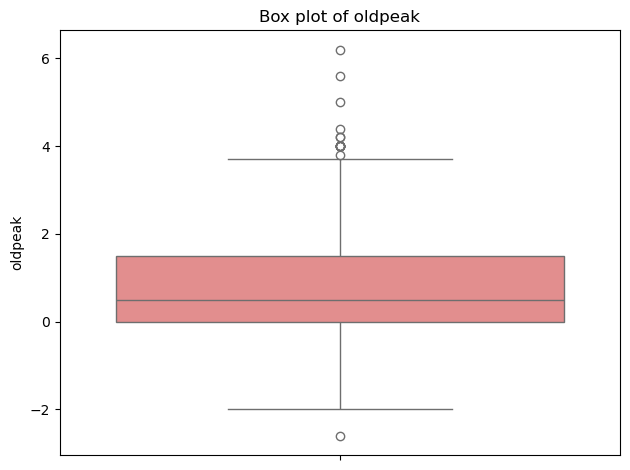

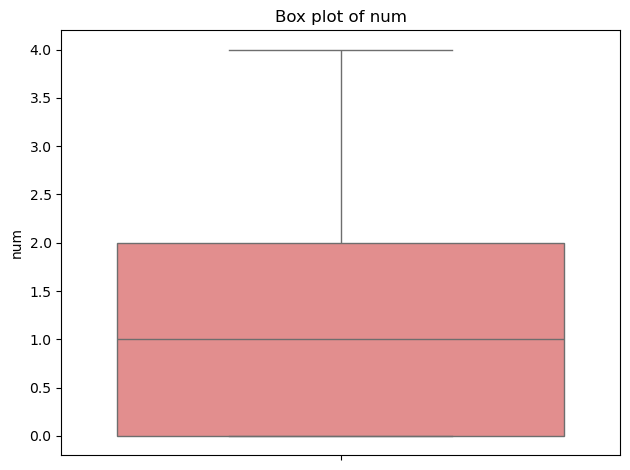

In [21]:
for col in num_col:
    figsize=(15, 12)
    sns.boxplot(data=df, y=col, color="lightcoral")
    plt.title(f"Box plot of {col}")
    plt.tight_layout()
    plt.show()

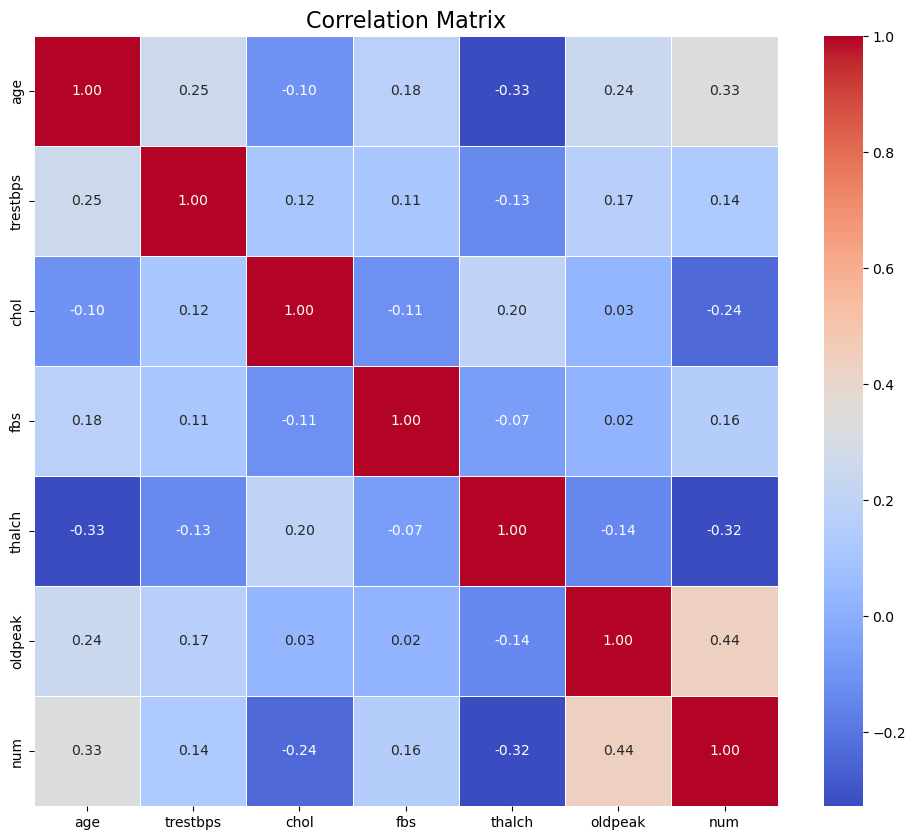

In [22]:
plt.figure(figsize=(12, 10))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [23]:
# 3. Feature Engineering:

In [24]:
# If necessary, perform feature engineering techniques such as encoding categorical variables, scaling numerical features, or handling missing values.

In [25]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [26]:
num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = df.select_dtypes(include=['object', 'category']).columns

In [27]:
imputer_num = SimpleImputer(strategy='mean')
df[num_col] = imputer_num.fit_transform(df[num_col])

In [28]:
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_col] = imputer_cat.fit_transform(df[cat_col])

In [29]:
label_encoders = {}
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [30]:
scaler = StandardScaler()
df[num_col] = scaler.fit_transform(df[num_col])

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.006027,1,3,0.567394,0.281297,True,0,0.524183,0,1.334996,0,0,-0.881977
1,-1.397560,1,1,0.076967,0.013526,False,1,-0.147705,0,-0.844594,1,0,-0.881977
2,0.350503,1,0,0.322181,-0.084656,False,1,0.449529,0,-0.465535,1,0,-0.881977
3,-0.195767,1,3,-0.756760,-0.138211,False,0,2.017268,0,-0.844594,1,0,-0.881977
4,0.350503,1,0,-1.149102,-0.004325,False,1,-0.371668,1,0.576878,1,0,-0.881977


In [32]:
# 4. Decision Tree Classification:

In [33]:
# Split the dataset into training and testing sets (e.g., using an 80-20 split).

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [36]:
x = df.drop("num", axis='columns')
y = df.num

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

In [38]:
# Implement a Decision Tree Classification model using a library like scikit-learn.

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
model = DecisionTreeClassifier(random_state=42)

In [41]:
# Train the model on the training set and evaluate its performance on the testing set using appropriate evaluation 
# metrics (e.g., accuracy, precision, recall, F1-score, ROC-AUC).

In [42]:
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [46]:
y_pred = model.predict(x_test)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [47]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.6813186813186813


In [52]:
print("precision_score:", precision_score(y_test, y_pred))

precision_score: 0.4666666666666667


In [53]:
print("recall_score:", recall_score(y_test, y_pred))

recall_score: 0.38181818181818183


In [54]:
print("f1_score:", f1_score(y_test, y_pred))

f1_score: 0.42


In [55]:
print("roc_auc_score:", roc_auc_score(y_test,y_pred))

roc_auc_score: 0.596420901932713


In [56]:
# 5. Hyperparameter Tuning:

In [57]:
# Perform hyperparameter tuning to optimize the Decision Tree model. Experiment with different hyperparameters such as
# maximum depth, minimum samples split, and criterion.

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [65]:
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [67]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [68]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10}


In [69]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [71]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       127
           1       0.73      0.44      0.55        55

    accuracy                           0.78       182
   macro avg       0.76      0.68      0.70       182
weighted avg       0.77      0.78      0.76       182



In [72]:
# 6. Model Evaluation and Analysis:

In [73]:
# Analyse the performance of the Decision Tree model using the evaluation metrics obtained.

In [74]:
# The model performs very well for class 0, but poorly for class 1.

# High recall for class 0 and low recall for class 1 suggests the model is biased toward the majority class.

# For medical use-cases like heart disease prediction, it's critical to improve recall for class 1 (true positive rate).

In [75]:
# Visualize the decision tree structure to understand the rules learned by the model and identify important features

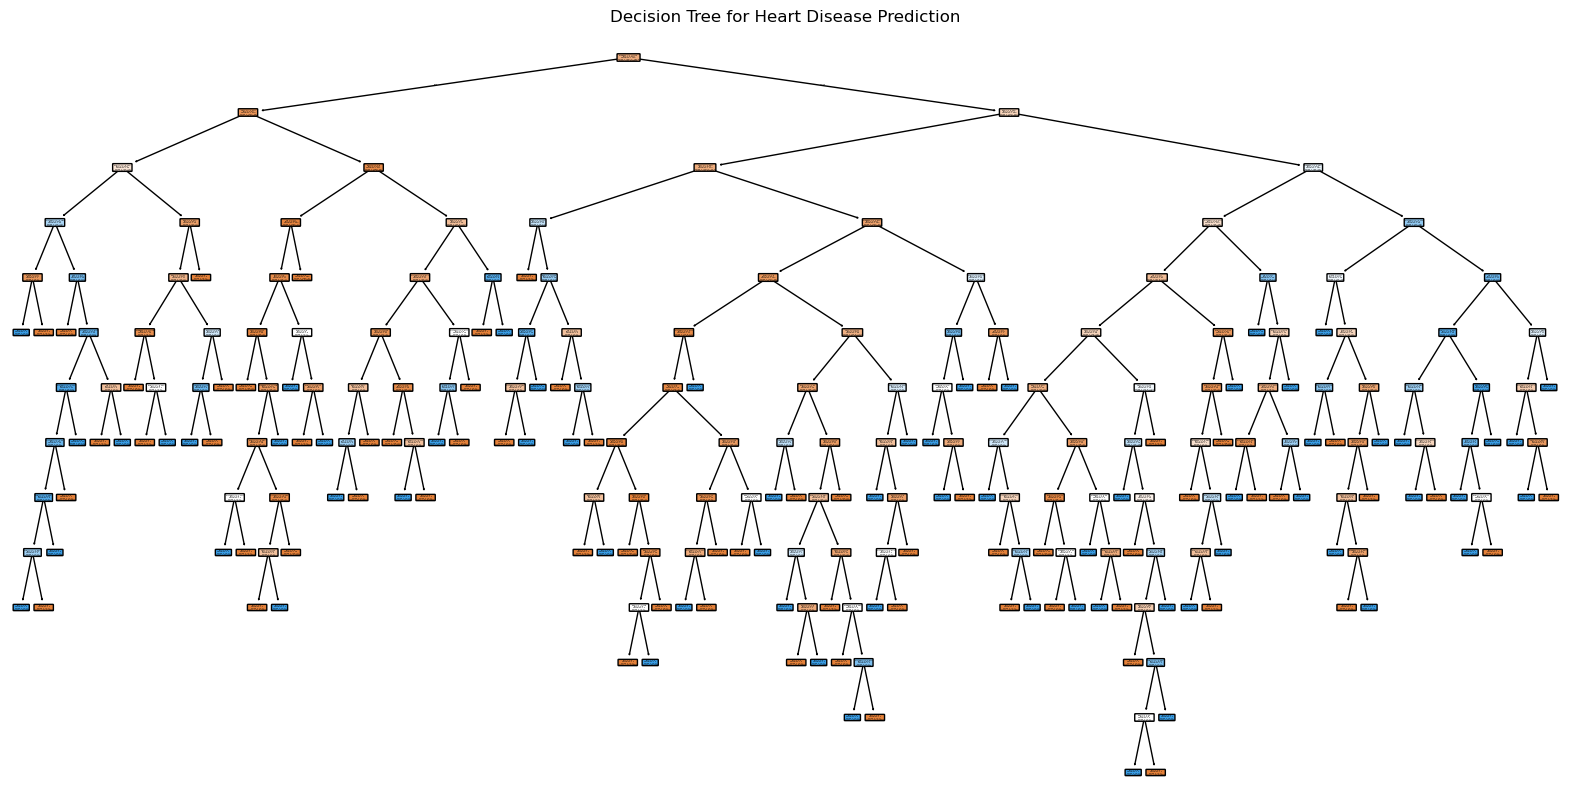

In [77]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=x.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.title("Decision Tree for Heart Disease Prediction")
plt.show()

In [81]:
importances = pd.Series(model.feature_importances_, index=x.columns)
importances = importances.sort_values(ascending=False)
print("Feature Importance:\n", importances)

Feature Importance:
 oldpeak     0.162428
age         0.153490
trestbps    0.151794
thalch      0.142932
chol        0.126446
cp          0.057203
exang       0.049629
slope       0.041407
restecg     0.039697
thal        0.028248
sex         0.026321
fbs         0.020406
dtype: float64


In [1]:
# Interview Questions:

In [2]:
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

In [4]:
# 1.max_depth:
# What it does:
# Sets the maximum depth of the tree.

# Effect:
# Lower value → underfitting.
# Higher value → overfitting.
# Tip: Try tuning it to prevent your model from growing too complex.

In [5]:
# 2. min_samples_split
# What it does:
# Minimum number of samples required to split an internal node.

# Effect:
# Higher value → fewer splits → simpler tree (prevents overfitting).
# Lower value → more splits → more complex tree.

In [6]:
# 3. min_samples_leaf
# What it does:
# Minimum number of samples required to be at a leaf node.

# Effect:
# Prevents small leaves which may overfit.
# Encourages generalization if set higher.

In [7]:
# 4. max_features
# What it does: Number of features to consider when looking for the best split.

# Effect:
# Helps reduce variance.
# Lower values → more randomness → potentially better generalization.

In [8]:
# 5. max_leaf_nodes
# What it does: Limits the number of leaf nodes in the tree.

# Effect:
# Forces the tree to focus on the most important splits.
# Helps control model complexity.

In [9]:
#  6. criterion
# What it does: Function to measure the quality of a split.

# For classification: 'gini' or 'entropy'
# For regression: 'squared_error', 'absolute_error', etc.

# Effect:
# Affects how splits are chosen (can influence accuracy/memory usage).

In [ ]:
#  7. ccp_alpha (Cost Complexity Pruning)
# What it does: Applies post-pruning using minimal cost-complexity.

# Effect:
# Helps simplify the model by trimming insignificant branches.
# Higher values lead to more pruning (simpler tree).